# **GRIP Task_1 #Predicitive Analysis Using Supervised ML**
**Musa Raza Abidi** , 
Data Science and Business Analytics Internee at The Spark Foundation

# Loading Dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

print(data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [70]:
data.shape

(25, 2)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [72]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Correlations in the data')

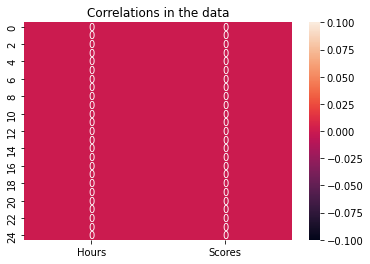

In [73]:

sns.heatmap(data.isnull(), annot = True) # annot=True will show corr values
plt.title('Correlations in the data')

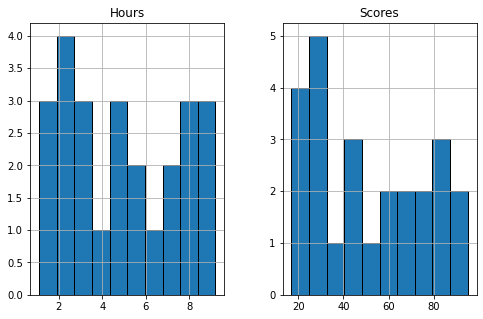

In [74]:
data.hist(figsize=(8,5), edgecolor = 'Black');

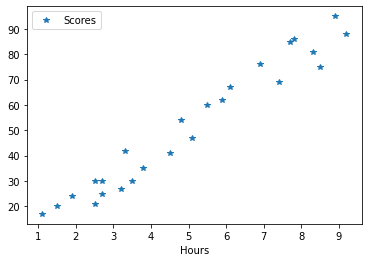

In [75]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  

In [76]:
data.iloc[0:4,0:3]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


#y=mx+c
x=independent variable

y=dependent variable

In [78]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [77]:
x.shape

(25, 1)

#Splitting the data into train and test 
60% of the data is used in the training data set, and the rest 40% is used in the testing dataset/holdout, to test the validity of the training set.




*   Train Dataset: Used to fit the machine learning model.
*   Test Dataset: Used to evaluate the fit machine learning model.








In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


#Supervised ML Model - Linear Regression 
y=mx+c

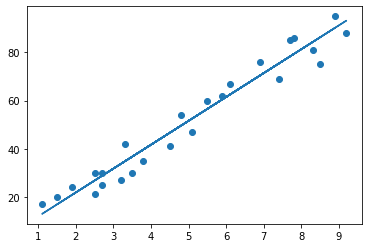

In [56]:
#To instantiate a linear regression model, refer to the code here:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit the model to the  Humidity  column in the training data using this code:
model.fit(x_train, y_train)

# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [79]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [49]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Predictive Analysis

In [66]:
# Predict the score with 9.25 hours of study
Hours = 9.25
own_pred = model.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [68]:
#Scoring the Model
model.score(x_test,y_test)

0.9454906892105354